<a href="https://colab.research.google.com/github/DHRUVCHARNE/20InterviewPracticeReactAssignments/blob/main/PythonAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install websockets

import asyncio
import websockets
import json
import csv
import time
from pathlib import Path

SOCKET_URL = "wss://ws.coincap.io/prices?assets=bitcoin,ethereum,tether,binance-coin,solana,usd-coin"
CSV_FILE_PATH = "stock_data.csv"
BATCH_SIZE = 10
MAX_MESSAGES = 50  # Limit the number of messages for testing

async def fetch_stock_data():
    buffer = []
    message_count = 0  # Counter to track the number of messages received
    while message_count < MAX_MESSAGES:
        try:
            async with websockets.connect(SOCKET_URL) as websocket:
                print("Connected to WebSocket")
                while message_count < MAX_MESSAGES:
                    try:
                        message = await asyncio.wait_for(websocket.recv(), timeout=10)
                        data = json.loads(message)
                        timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())
                        for symbol, price in data.items():
                            buffer.append([timestamp, symbol, price])

                        # Write in batches to the CSV file
                        if len(buffer) >= BATCH_SIZE:
                            write_to_csv(buffer)
                            buffer.clear()

                        message_count += 1
                    except asyncio.TimeoutError:
                        print("Timeout - No message received. Retrying...")
                        break  # Exit the inner loop to reconnect

        except websockets.exceptions.ConnectionClosedError:
            print("Connection lost. Reconnecting in 5 seconds...")
            await asyncio.sleep(5)  # wait before reconnecting

def write_to_csv(data):
    file_exists = Path(CSV_FILE_PATH).exists()
    with open(CSV_FILE_PATH, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["timestamp", "symbol", "price"])  # header
        writer.writerows(data)

# Run the WebSocket connection
await fetch_stock_data()

# Download the resulting CSV file
from google.colab import files
files.download(CSV_FILE_PATH)


Connected to WebSocket


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-3-453d2709770a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['temperature'].fillna(method='ffill', inplace=True)
<ipython-input-3-453d2709770a>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['temperature'].fillna(method='ffill', inplace=True)


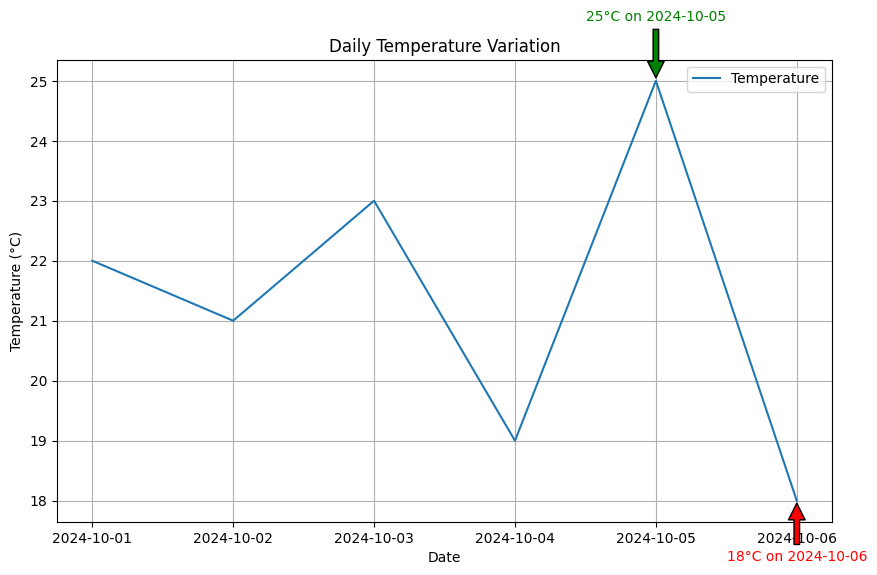

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the temperature data
data = pd.read_csv('/content/temperature.csv', parse_dates=['date'])

# Handle missing values (if any)
data['temperature'].fillna(method='ffill', inplace=True)

# Identify max and min temperatures
max_temp = data['temperature'].max()
min_temp = data['temperature'].min()
max_date = data.loc[data['temperature'] == max_temp, 'date'].values[0]
min_date = data.loc[data['temperature'] == min_temp, 'date'].values[0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['temperature'], label='Temperature')
plt.title("Daily Temperature Variation")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)

# Annotate the highest and lowest points
plt.annotate(f'{max_temp}°C on {pd.to_datetime(max_date).date()}', xy=(max_date, max_temp), xytext=(max_date, max_temp + 1),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=10, ha='center', color='green')
plt.annotate(f'{min_temp}°C on {pd.to_datetime(min_date).date()}', xy=(min_date, min_temp), xytext=(min_date, min_temp - 1),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, ha='center', color='red')

plt.legend()
plt.show()


In [4]:
import pandas as pd

# Load the sales data
data = pd.read_csv("sales_data.csv")

# Calculate total sales per region
data['total_sales'] = data['price'] * data['quantity']
region_sales = data.groupby('region')['total_sales'].sum().reset_index()

# Create average price per unit column for each product
data['average_price_per_unit'] = data.groupby('product_id')['price'].transform('mean')

# Filter rows with total sales > 10,000
filtered_data = data[data['total_sales'] > 10000]

# Output results
print("Total Sales by Region:\n", region_sales)
print("\nData with Average Price per Unit:\n", data[['product_id', 'average_price_per_unit']].drop_duplicates())
print("\nFiltered Data (Total Sales > 10,000):\n", filtered_data)


Total Sales by Region:
   region  total_sales
0   East         7000
1  North        14000
2  South         9000
3   West        12000

Data with Average Price per Unit:
    product_id  average_price_per_unit
0         101                   500.0
1         102                   600.0
2         103                   300.0
3         104                   800.0
4         105                   700.0

Filtered Data (Total Sales > 10,000):
    product_id        date  price  quantity region  total_sales  \
2         103  2024-09-02    300        40   West        12000   

   average_price_per_unit  
2                   300.0  


In [5]:
# Save filtered data to a new CSV file
filtered_data.to_csv("filtered_sales_data.csv", index=False)

# Download the file
from google.colab import files
files.download("filtered_sales_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>